# Fusion Clean and Model huc01

In [1]:
#module imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob

os.getcwd()
hucname = 'HUC01'

In [2]:
file_list = glob.glob(os.path.join('huc01_data', '*.csv'))
dataframe = pd.concat(map(pd.read_csv, file_list), ignore_index=True)

#Drop na, synch column names if needed, and remove negative band values
df=dataframe.dropna(subset=['red', 'date']).drop_duplicates(subset = ['SiteID', 'date'])
df = df[(df.red > 0) & (df.nir > 0) & (df.blue > 0) & (df.green > 0) & (df.swir1 > 0) & (df.swir2 > 0) & (df.nir > 0)]

print(df.columns.values.tolist())
print((df.SiteID.unique()))
print(df.shape[0])

['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd']
['1111REG1-CRBL06' '1111REG1-CRBL11' '1111REG1-CRBL09' '11113300-27-MER'
 'USGS-01049265' '1111REG1-CRBL07' '1111REG1-CRBL05' 'USGS-01100000'
 'MYRWA-WIB001' '11113300-08-MER' '11113300-16-MER' 'USGS-01036390'
 'USGS-01059400' 'MYRWA-MIB001' 'USGS-01115170']
11184


In [3]:
#df.describe()

In [4]:
# Column formatting
# df['date'] = df['date'].str.slice(2, 12)
# df['date'] = df['date'].str.replace('_','-')
# df.date

In [5]:
#Add band ratios
df = df.assign(NR = df['nir']/df['red'],
                BR = df['blue']/df['red'],
                GR = df['green']/df['red'],
                SR = df['swir1']/df['red'],
                BG = df['blue']/df['green'],
                RG = df['red']/df['green'],
                NG = df['nir']/df['green'],
                SG = df['swir1']/df['green'],
                BN = df['blue']/df['nir'],
                GN = df['green']/df['nir'],
                RN = df['red']/df['nir'],
                SN = df['swir1']/df['nir'],
                BS = df['blue']/df['swir1'],
                GS = df['green']/df['swir1'],
                RS = df['red']/df['swir1'],
                NS = df['nir']/df['swir1'],
                R_GN = df['red']/ (df['green'] + df['nir']),
                R_GB = df['red']/ (df['green'] + df['blue']),
                R_GS = df['red']/ (df['green'] + df['swir1']),
                R_BN = df['red']/ (df['blue'] + df['nir']),
                R_BS = df['red']/ (df['blue'] + df['swir1']),
                R_NS = df['red']/ (df['nir'] + df['swir1']),
                G_BR = df['green']/ (df['blue'] + df['red']),
                G_BN = df['green'] / (df['blue'] + df['nir']),
                G_BS = df['green'] / (df['blue'] + df['swir1']),
                G_RN = df['green'] / (df['red'] + df['nir']),
                G_RB = df['green'] / (df['red'] + df['blue']),
                G_NS = df['green'] / (df['nir'] + df['swir1']),
                B_RG = df['blue'] / (df['red'] + df['green']),
                B_RN = df['blue'] / (df['red'] + df['nir']),
                B_RS = df['blue'] / (df['red'] + df['swir1']),
                B_GN = df['blue'] / (df['green'] + df['nir']),
                B_GS = df['blue'] / (df['green'] + df['swir1']),
                B_NS = df['blue'] / (df['nir'] + df['swir1']),
                N_RG = df['nir'] / (df['red'] + df['green']),
                N_RB = df['nir'] / (df['red'] + df['blue']),
                N_RS = df['nir'] / (df['red'] + df['swir1']),
                N_GB = df['nir'] / (df['green'] + df['blue']),
                N_GS = df['nir'] / (df['green'] + df['swir1']),
                N_BS = df['nir'] / (df['blue']  + df['swir1']),
                
                GR2 = (df['green'] + df['red']) / 2,
                GN2 = (df['green'] + df['nir']) / 2,
                RN2 = (df['red'] + df['nir']) / 2,
               
                #blooms
                BR_G = (df['blue'] - df['red']) / df['green'],
                NS_NR = (df['nir'] - df['swir1']) / (df['red'] - df['swir1']),
                fai = df['nir'] - (df['red'] + (df['swir1']-df['red'])*((830-660)/(1650-660))),
                # fai = (nir - red) + (red -swir) * (830-660)/(1648-660)
                N_S= df['nir'] - df['swir1'],
                N_R = df['nir']- df['red'],
                #
                ndvi = ((df['nir']-df['red'])/(df['nir']+df['red'])),
                ndwi = ((df['green']- df['swir1'])/(df['green'] + df['swir1'])),
                ndssi = ((df['blue'] - df['nir'])/ (df['blue'] + df['nir'])),
                gn_gn= ((df['green']- df['nir'])/ (df['green'] + df['nir'])),
                Matchup = 'Fusion')


In [6]:
#Rename to fusion and add some new colunms for plotting/sorting/exploring data
fusion = df.sort_values(by = 'date')
#fusion['date'] = pd.to_datetime(fusion.date).dt.strftime("%Y-%m-%d")
fusion['year'] = pd.to_datetime(fusion['date']).dt.year
fusion['month'] = pd.to_datetime(fusion['date']).dt.month
print(fusion.columns.values.tolist())
print(fusion.shape[0])

['SiteID', 'date', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year', 'month']
11184


In [7]:
#fusion.to_csv(r'r_gbFusion_16Sites.csv')

In [8]:
#Generate a first look Plot
# plot = sns.scatterplot(data=fusion, x="date", y="red", hue="SiteID")
# plt.legend(fontsize='6')

# sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
# plot


# g = sns.FacetGrid(fusion, col="SiteID", col_wrap = 6, palette = ['blue'])
# g.map_dataframe(sns.scatterplot, x="date", y="RN2")
# #g.set_xlabel('',fontsize=20);
# #g.set_ylabel('TSS (mg/L)',fontsize=20);
# g.add_legend()
# g.set_titles(size=12)


In [9]:
#Matchups
#bring in WQP cleaned data
huc = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/WQP/WQP_notAquasat/wqp_huc01_notAquasat_tss.csv')
huc['tss'] = huc['value']
#huc['month'] = pd.to_datetime(huc['date'], format = '%Y-%m-%d').dt.month
print(huc.columns.values.tolist())
print(len(huc.index))
print(huc['units'].unique())

#site = huc[huc['SiteID'] == 'INSTOR_WQX-2221'] #'USGS-03049625']
#site = site[site['date'] > '2000-01-01']
#print(site)
print((huc.SiteID.unique()))

['date', 'parameter', 'SiteID', 'huc', 'org', 'org_id', 'time', 'sample_method', 'analytical_method', 'particle_size', 'date_time', 'media', 'fraction', 'status', 'hydroCondition', 'hydroEvent', 'lat', 'long', 'datum', 'parameter_name', 'value', 'units', 'sample_depth', 'sample_depth_unit', 'tss']
14779
['%' 'mg/l']
['USGS-01015000' 'USGS-01017100' 'USGS-01017500' 'USGS-01036390'
 'USGS-01049265' 'USGS-01059400' 'USGS-01054200' 'USGS-01021050'
 'USGS-01022500' 'USGS-01066000' 'USGS-01064140' 'USGS-01073319'
 'USGS-01096710' 'USGS-010965852' 'USGS-01097270' 'USGS-01100600'
 'USGS-01095220' 'USGS-01100000' 'USGS-01100568' 'USGS-01089925'
 'USGS-01089985' 'USGS-01089751' 'USGS-01089540' 'USGS-01096550'
 'USGS-01097480' 'USGS-01089744' 'USGS-01104455' 'USGS-01104430'
 'USGS-01115183' 'USGS-01104433' 'USGS-01104475' 'USGS-01104415'
 'USGS-01115110' 'USGS-01115114' 'USGS-01104405' 'USGS-01115170'
 'USGS-01115098' 'USGS-01104420' 'USGS-01113895' 'USGS-01112262'
 'USGS-01101500' 'USGS-01117800

In [10]:
#Rename columns and merge huc and fusion
# huc['tss'] = huc['value']

# huc = huc[['SiteID', 'tss', 'date', 'year']]

# fusionMerge = pd.merge(df, huc, on =['SiteID', 'date'], how ="inner")
# fusionMerge['SiteID'].unique()
# fusionMerge.drop_duplicates()

# #Add a transformation

# fusionMerge['R_GB_log'] = np.log(fusionMerge['R_GB'])
# fusionMerge['tss_log'] = np.log(fusionMerge['tss'])


# Matchup +/- 1 day

In [11]:
#Merge data +/- 1 day
#sort the dataframes
huc = huc.sort_values(by = 'date')
huc['date'] = pd.to_datetime(huc['date'], format = '%Y-%m-%d')
hucMerge= huc[huc['units'] == 'mg/l']

#hucMerge = huc.drop(['month', 'year'], axis=1)

fusion = fusion.sort_values(by = 'date')
fusion['date'] = pd.to_datetime(fusion['date'], format = '%Y-%m-%d')


fusionMerge_timediff = pd.merge_asof(hucMerge, fusion, on = 'date', by ='SiteID',
                                 tolerance=pd.Timedelta(1, "d"),
                                 allow_exact_matches=True).dropna(subset = 'red')

#fusionMerge_timediff['red_log'] = np.log10(fusionMerge_timediff['red'])
#fusionMerge_timediff['tss'] = np.log(fusionMerge_timediff['tss_x'])

fusionMerge_timediff['tss_log'] = np.log10(fusionMerge_timediff['tss'])
fusionMerge_timediff['B_RG_log'] = np.log10(fusionMerge_timediff['B_RG'])

# print the variable
print(fusionMerge_timediff.columns.values.tolist())
print('# of Matchups Across all Sites:', len(fusionMerge_timediff.index))

#get siteID's
fusionSites = list(fusionMerge_timediff.SiteID.unique())
print(fusionSites)

['date', 'parameter', 'SiteID', 'huc', 'org', 'org_id', 'time', 'sample_method', 'analytical_method', 'particle_size', 'date_time', 'media', 'fraction', 'status', 'hydroCondition', 'hydroEvent', 'lat', 'long', 'datum', 'parameter_name', 'value', 'units', 'sample_depth', 'sample_depth_unit', 'tss', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year', 'month', 'tss_log', 'B_RG_log']
# of Matchups Across all Sites: 91
['MYRWA-WIB001', 'MYRWA-MIB001', 'USGS-01100000', '11113300-27-MER', '11113300-16-MER', '1111

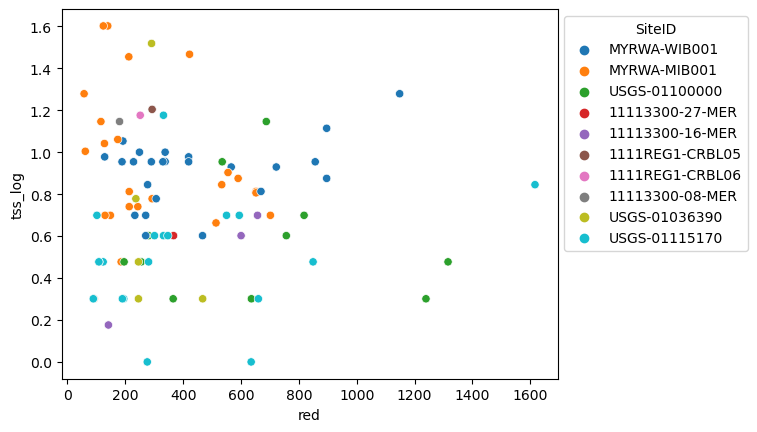

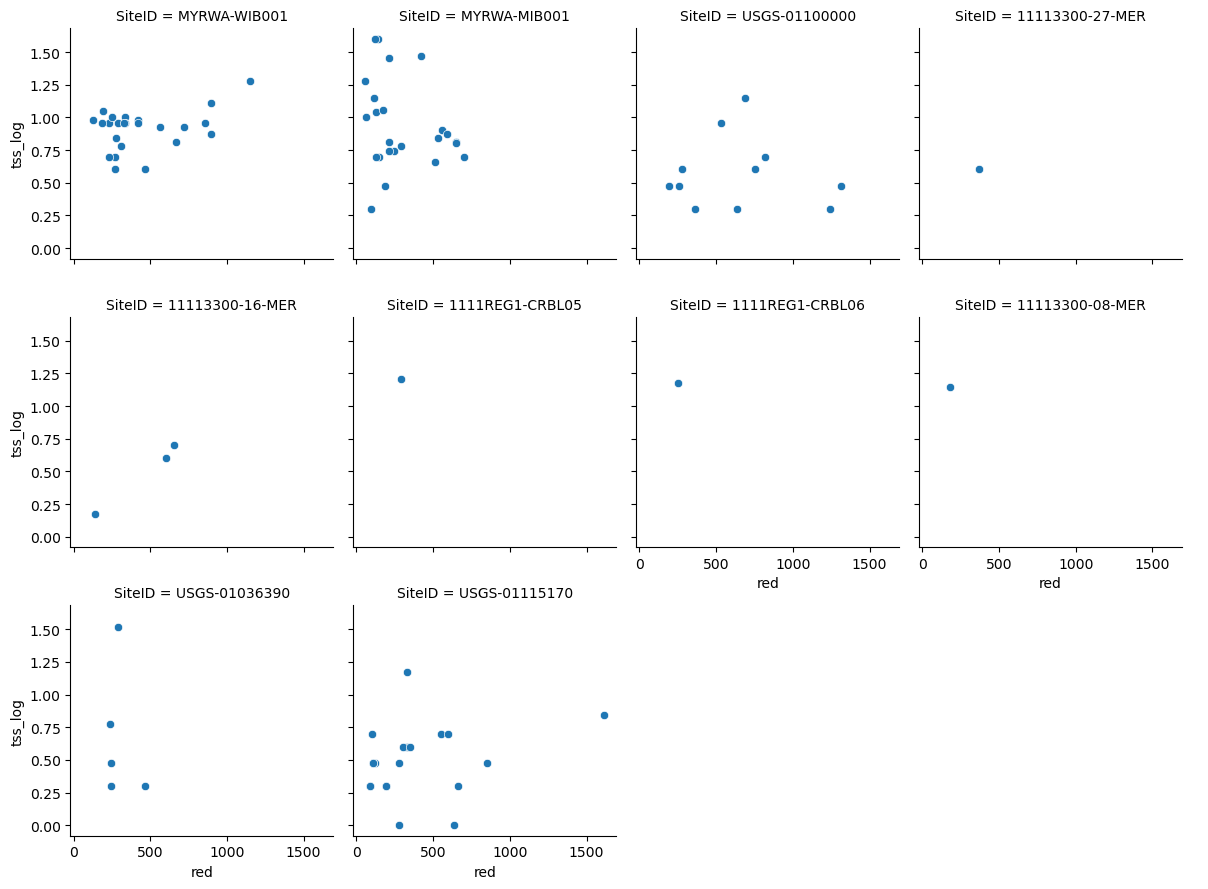

In [12]:
#Generate Plot

fusionMerge_timediffP = fusionMerge_timediff[(fusionMerge_timediff.red < 1100)]
plot = sns.scatterplot(data=fusionMerge_timediff, x="red", y="tss_log", hue="SiteID")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot

g = sns.FacetGrid(fusionMerge_timediff, col="SiteID", col_wrap = 4)
g.map_dataframe(sns.scatterplot, x="red", y="tss_log")
g.add_legend()


In [13]:
huc_aquaSites = huc[huc['SiteID'].isin(fusionSites)]
huc_aquaSites = huc_aquaSites[huc_aquaSites['units'] == 'mg/l']
print(huc_aquaSites.SiteID.unique())
print((huc_aquaSites.columns.values.tolist()))

['USGS-01036390' '11113300-08-MER' '11113300-16-MER' '11113300-27-MER'
 'USGS-01100000' 'MYRWA-WIB001' 'MYRWA-MIB001' '1111REG1-CRBL05'
 '1111REG1-CRBL06' 'USGS-01115170']
['date', 'parameter', 'SiteID', 'huc', 'org', 'org_id', 'time', 'sample_method', 'analytical_method', 'particle_size', 'date_time', 'media', 'fraction', 'status', 'hydroCondition', 'hydroEvent', 'lat', 'long', 'datum', 'parameter_name', 'value', 'units', 'sample_depth', 'sample_depth_unit', 'tss']


# No Matchup

In [14]:
#All unmatched fusion

fusionMerge_timediff_cute = fusionMerge_timediff [['SiteID', 'date']]

fusUnmatched = pd.merge(fusionMerge_timediff_cute, fusion, on =['SiteID', 'date'], how ="outer")
#Filtered
#fusUnmatched = fusUnmatched[(fusUnmatched.R_GB < 1.0)] #& (aquaFusion.tss < 150)

fusUnmatched['Matchup'] = 'Fusion No Matchup'
print('All Site Fusion Unmatched huc:', len(fusUnmatched.index))
fusUnmatched_fusionSites = fusUnmatched[fusUnmatched['SiteID'].isin(fusionSites)]
print('Unmatched Fusion Sites:', len(fusUnmatched.SiteID.unique()))

#All unmatched WQP

fusionMerge_timediff_cute = fusionMerge_timediff [['SiteID', 'date']]

wqpUnmatched = pd.merge(fusionMerge_timediff_cute, huc, on =['SiteID', 'date'], how ="outer")
wqpUnmatched['Matchup'] = 'WQP'
print('All WQP Unmatched huc:', len(wqpUnmatched.index))
wqpUnmatched_fusionSites = wqpUnmatched[wqpUnmatched['SiteID'].isin(fusionSites)]
print('Unmatched WQP Sites Current Subset:', len(wqpUnmatched_fusionSites.index))



All Site Fusion Unmatched huc: 11231
Unmatched Fusion Sites: 15
All WQP Unmatched huc: 14793
Unmatched WQP Sites Current Subset: 570


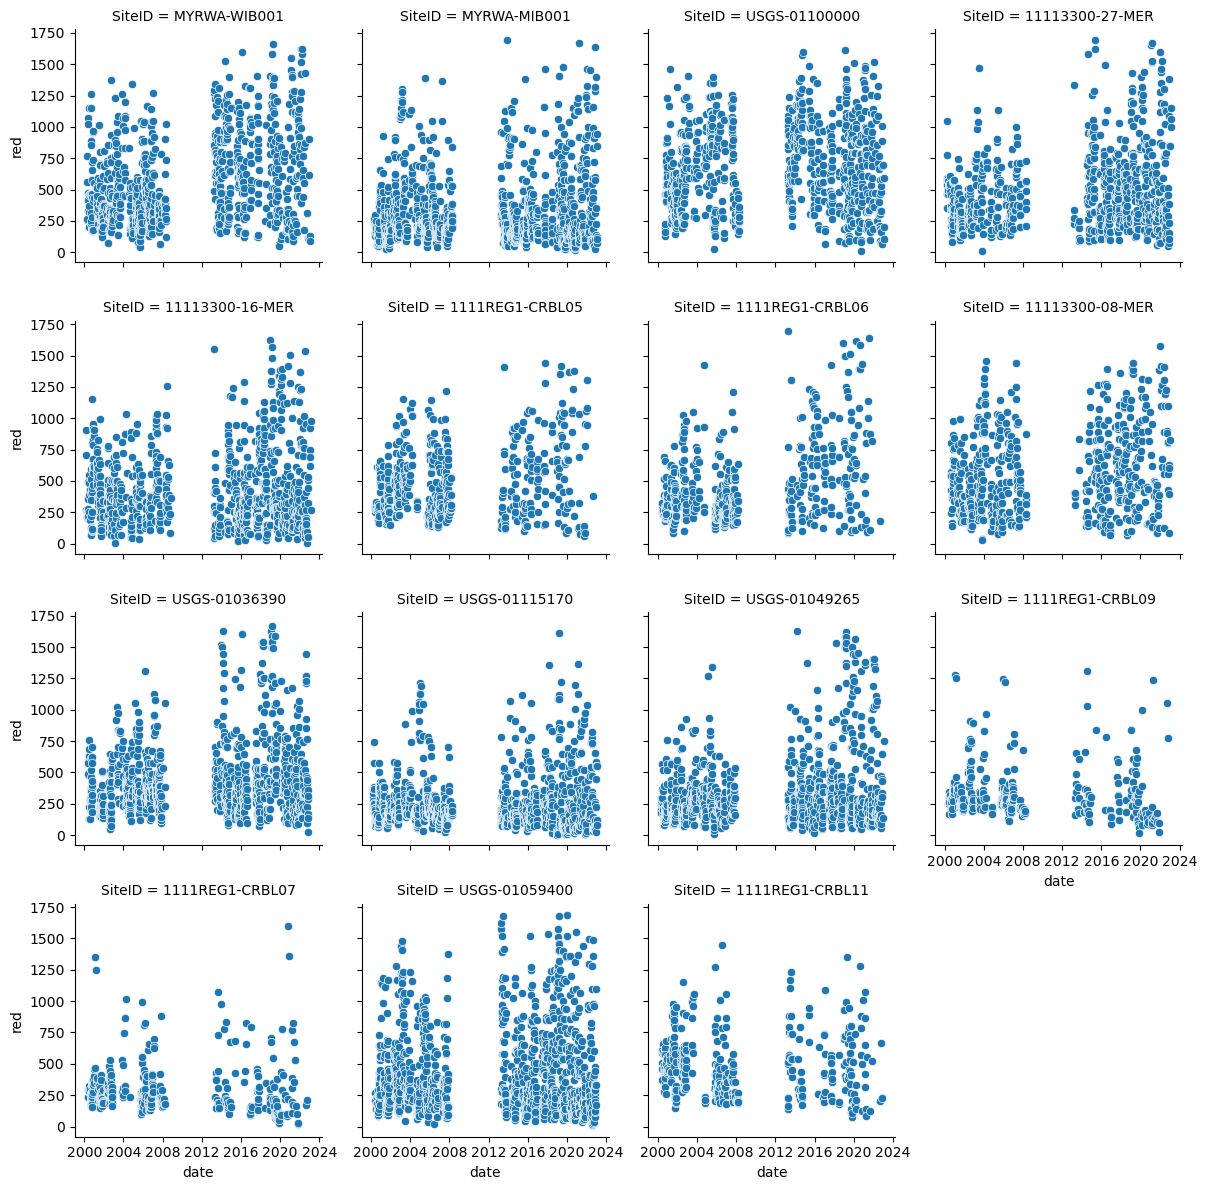

In [15]:
#Generate Plot

g = sns.FacetGrid(fusUnmatched, col="SiteID", col_wrap = 4)
g.map_dataframe(sns.scatterplot, x="date", y="red")
g.add_legend()

# plot = sns.scatterplot(data=fusUnmatched, x="date", y="R_GB", hue="SiteID")
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plot

# Aquasat

In [16]:
#Read in aquasat
#aquahuc = pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/Aquasat/aquasat_stream_tss.csv')
aquahuc =pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/LS2/aquaLS2_conus_ratio.csv')
aquahuc = aquahuc[aquahuc['SiteID'].isin(fusionSites)]
print(aquahuc.shape[0])
print(aquahuc.columns.values.tolist())


102
['Unnamed: 0.1', 'Unnamed: 0', 'system.index', 'SiteID', 'blue', 'blue_sd', 'date_unity', 'green', 'green_sd', 'nir', 'nir_sd', 'path', 'pixelCount', 'qa', 'qa_sd', 'red', 'red_sd', 'row', 'sat', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', '.geo', 'endtime', 'date', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'source', 'lat', 'long', 'TZID', 'date_utc', 'clouds', 'time', 'landsat_id', 'timediff', 'pwater', 'type', 'id', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sceneID', 'tss_log', 'R_GB_log', 'year', 'month', 'parameter', 'units', 'particle_size', 'hydroCondition', 'hydroEvent', 'dswe', 'dswe_sd', 'hillshade', 'hillshad

/scratch/ceewater-cpu001/6229611/ipykernel_2119478/2534018654.py:3: DtypeWarning: Columns (6,23,24,26,33,36,37,40,43,44,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  aquahuc =pd.read_csv('/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/LS2/aquaLS2_conus_ratio.csv')


In [17]:

# #Add a transformation
# aquahuc = aquahuc[aquahuc['units'] == 'mg/l']
aquahuc['R_GB_log'] = np.log10(aquahuc['R_GB'])
aquahuc['tss_log'] = np.log10(aquahuc['tss'])
#aquahuc['B_RG_log'] = np.log10(aquahuc['B_RG'])
aquahuc['date'] = pd.to_datetime(aquahuc['date'])
aquahuc['date'] = pd.to_datetime(aquahuc['date'], format = "%m/%d/%Y").dt.strftime("%Y-%m-%d")
aquahuc['year'] = pd.to_datetime(aquahuc['date']).dt.year
print(aquahuc.columns.values.tolist())
print(len(aquahuc.SiteID.unique()))


['Unnamed: 0.1', 'Unnamed: 0', 'system.index', 'SiteID', 'blue', 'blue_sd', 'date_unity', 'green', 'green_sd', 'nir', 'nir_sd', 'path', 'pixelCount', 'qa', 'qa_sd', 'red', 'red_sd', 'row', 'sat', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', '.geo', 'endtime', 'date', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'source', 'lat', 'long', 'TZID', 'date_utc', 'clouds', 'time', 'landsat_id', 'timediff', 'pwater', 'type', 'id', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sceneID', 'tss_log', 'R_GB_log', 'year', 'month', 'parameter', 'units', 'particle_size', 'hydroCondition', 'hydroEvent', 'dswe', 'dswe_sd', 'hillshade', 'hillshadow',

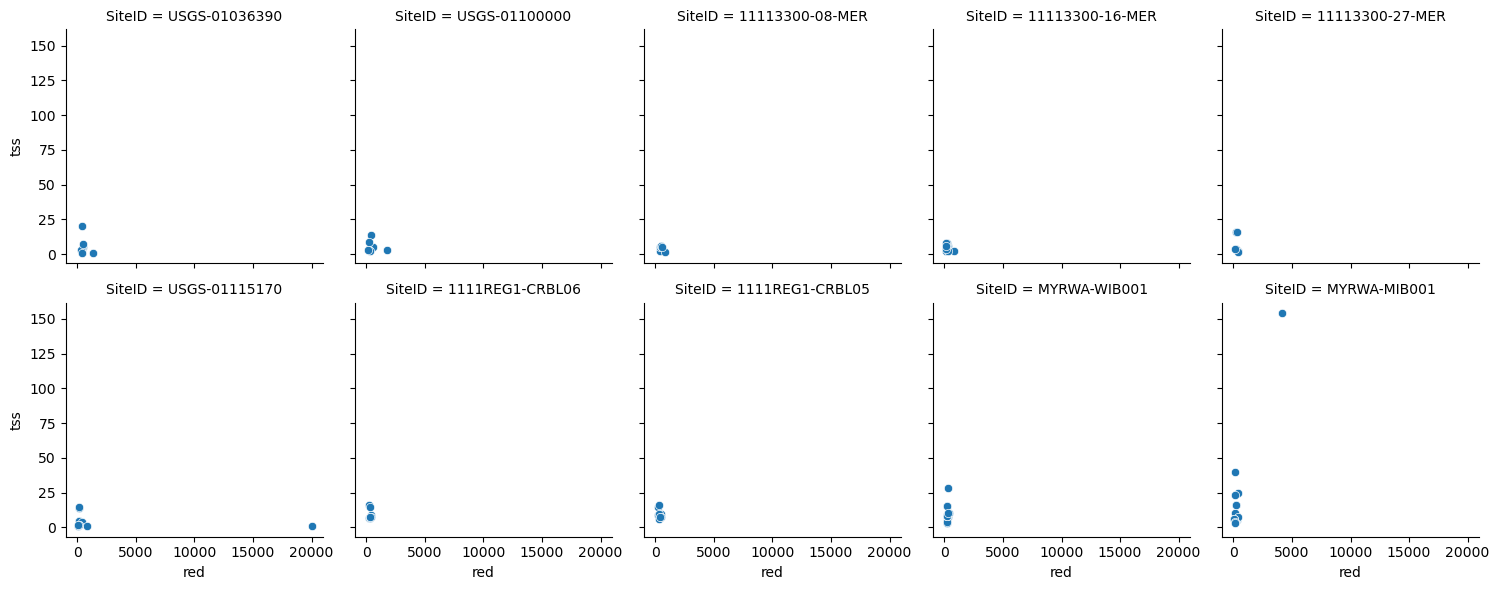

In [18]:
#Generate Plot Aquasat ONLY Sites 

# plot = sns.scatterplot(data=aquahuc, x="date", y="tss", hue="SiteID")
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plot


g = sns.FacetGrid(aquahuc, col="SiteID", col_wrap = 5)
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()

In [19]:
#AquaFusion data
aquahucForConcat = aquahuc[['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn']]


#Fuse data
aquaFusion = pd.concat([fusionMerge_timediff, aquahucForConcat]).dropna(subset='red').drop_duplicates(subset = ['SiteID', 'date'])
aquaFusion['date'] = pd.to_datetime(aquaFusion['date'])
aquaFusion['month'] = pd.to_datetime(aquaFusion['date']).dt.month
aquaFusion['year'] = pd.to_datetime(aquaFusion['date']).dt.year
aquaFusion['day'] = pd.to_datetime(aquaFusion['date']).dt.day
aquaFusion['R_GB_log'] = np.log10(aquaFusion['R_GB'])
aquaFusion['tss_log'] = np.log10(aquaFusion['tss'])



aquaFusion = aquaFusion[aquaFusion['SiteID'].isin(fusionSites)]
print(len(aquaFusion.index))
print(aquaFusion.Matchup.value_counts())
print(aquaFusion.columns.values.tolist())
#print(aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2282'])

#aquaFusion.to_csv(r'r_gb_aquaFusion_16Sites_12_2022.csv')

185
AquaSat    86
Fusion     84
LS2        15
Name: Matchup, dtype: int64
['date', 'parameter', 'SiteID', 'huc', 'org', 'org_id', 'time', 'sample_method', 'analytical_method', 'particle_size', 'date_time', 'media', 'fraction', 'status', 'hydroCondition', 'hydroEvent', 'lat', 'long', 'datum', 'parameter_name', 'value', 'units', 'sample_depth', 'sample_depth_unit', 'tss', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'pixelCount', 'blue_sd', 'green_sd', 'red_sd', 'nir_sd', 'swir1_sd', 'swir2_sd', 'dswe_sd', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'year', 'month', 'tss_log', 'B_RG_log', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis'

<AxesSubplot: xlabel='RN2', ylabel='tss'>

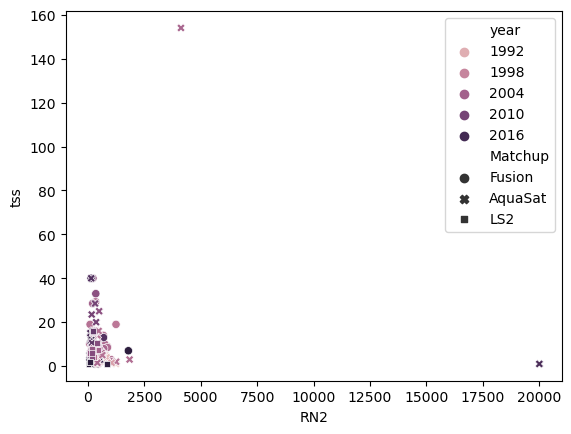

In [20]:
plot = sns.scatterplot(data=aquaFusion, x="RN2", y="tss", 
                       legend = 'brief', hue="year", style = 'Matchup')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plt.legend(fontsize='10')
plot#.set(xlim = (0, 2500), ylim = (0,2500))

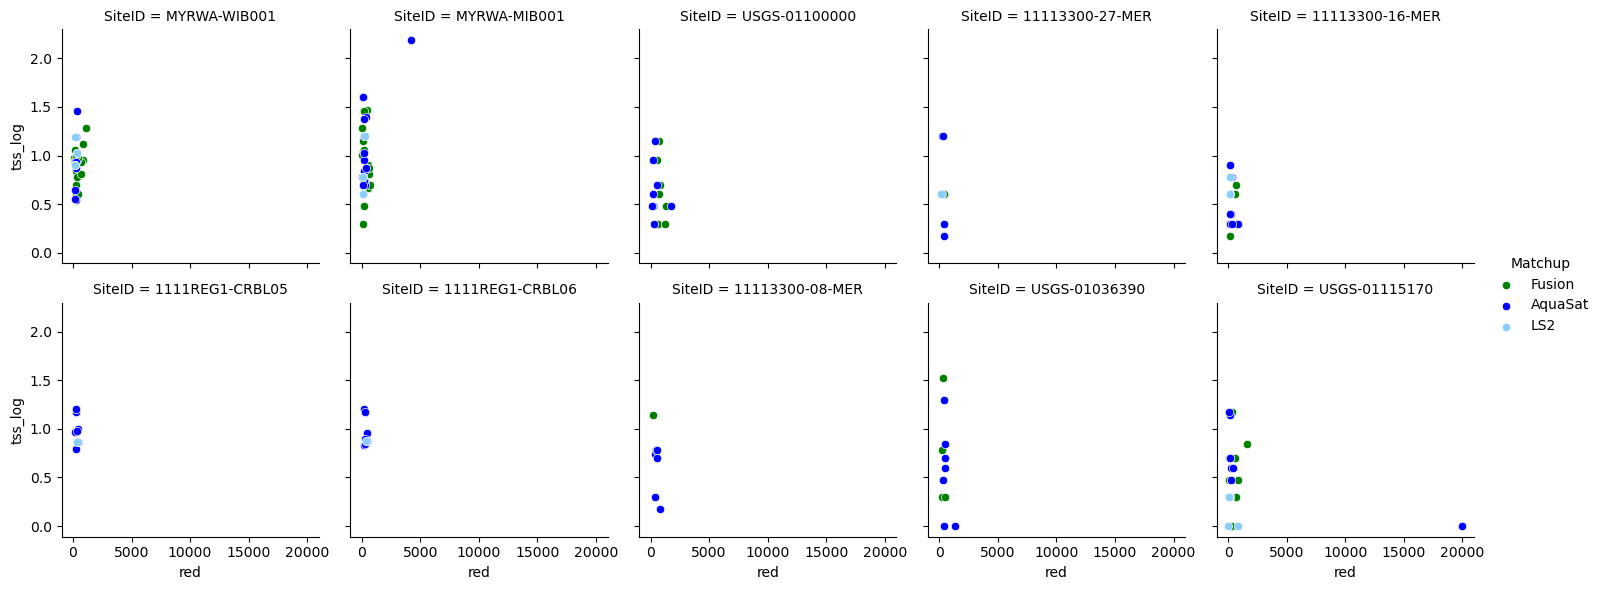

In [21]:
g = sns.FacetGrid(aquaFusion, col="SiteID", col_wrap = 5, hue = 'Matchup', palette = ['green', 'blue', 'lightskyblue'])
g.map_dataframe(sns.scatterplot, x="red", y="tss_log")
g.add_legend()

## Clean and Save for Modeling

count    185.000000
mean       8.640162
std       12.864212
min        1.000000
25%        3.500000
50%        6.000000
75%        9.300000
max      154.000000
Name: tss, dtype: float64
['11113300-16-MER', '11113300-27-MER', '1111REG1-CRBL05', '1111REG1-CRBL06', 'MYRWA-MIB001', 'MYRWA-WIB001', 'USGS-01036390', 'USGS-01100000', 'USGS-01115170']


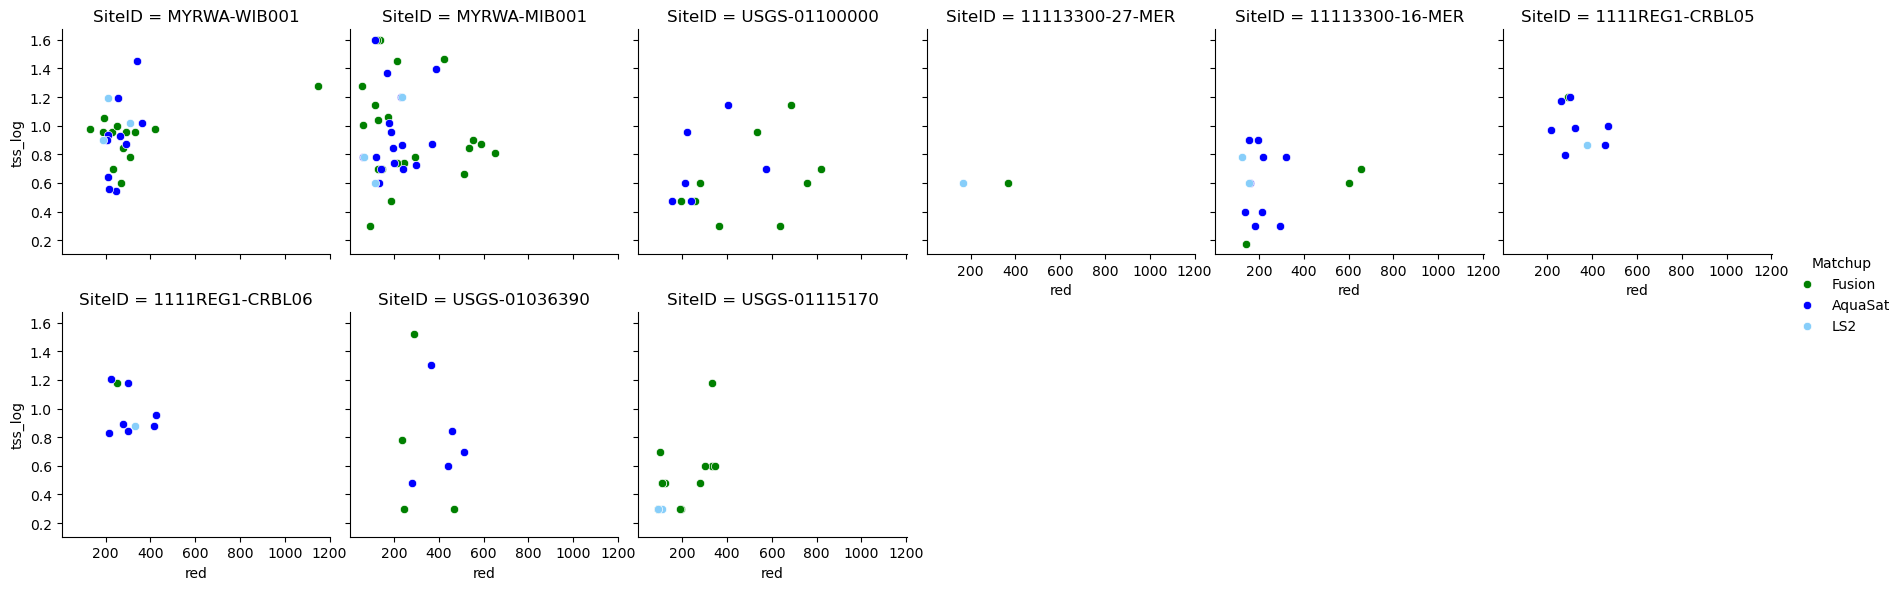

In [22]:
#CLEAN
aquaFusPlot = aquaFusion
print(aquaFusPlot.tss.describe())
aquaFusPlot = aquaFusion[(aquaFusion.pixelCount > 5) & (aquaFusion.tss < 200) & (aquaFusion.tss > 1) & (aquaFusion.red < 1500) & 
                         (aquaFusion.red > 0) & (aquaFusion.nir > 0)& (aquaFusion.nir < 1500)] #(aquaFusion.SiteID != 'USGS-03086000') & (aquaFusion.R_GB > 0.3)& (aquaFusion.R_GB < 0.8) & 

aquaFusSites = pd.DataFrame((aquaFusPlot.groupby(['SiteID', 'Matchup'])['tss'].count().unstack()).dropna(subset = 'Fusion')).index.values.tolist()
print(aquaFusSites)

aquaFusPlot = aquaFusPlot[aquaFusPlot['SiteID'].isin(aquaFusSites)]

g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup', col_wrap = 6, palette = ['green', 'blue', 'lightskyblue'])
g.map_dataframe(sns.scatterplot, x="red", y="tss_log")
#g.set_xlabel('',fontsize=20);
#g.set_ylabel('TSS (mg/L)',fontsize=20);
g.add_legend()
g.set_titles(size=12)

# plot = sns.scatterplot(data=aquaFusPlot, x="nir", y="tss", 
#                        hue="month", style = 'Matchup')
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
# plt.legend(fontsize='9')
# plot#.set(xlim = (0, 2500), ylim = (0,2500))


# plot = sns.scatterplot(data=aquaFusPlot, x="green", y="blue", 
#                        legend = 'brief', 
#                        style = 'Matchup', hue="SiteID")
# plt.legend(fontsize='10')
# sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))
# plot

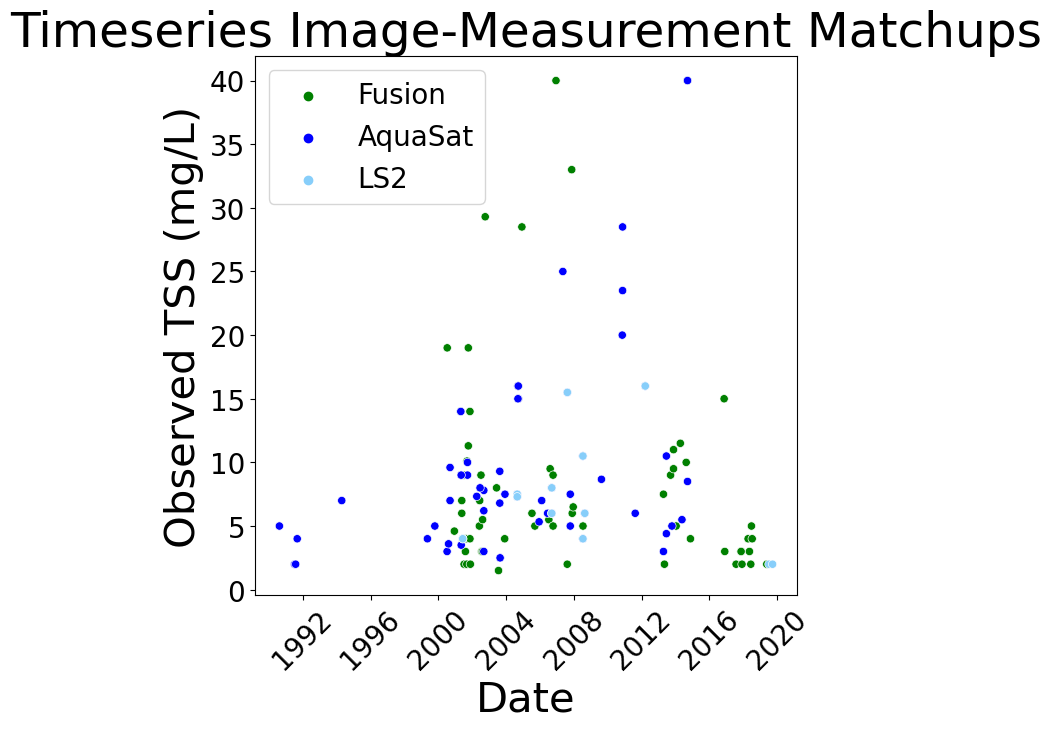

In [23]:
plt.figure(figsize=(7,7))
aquaFusSite = aquaFusion[(aquaFusion.SiteID == 'USGS-03086000')]
g = sns.scatterplot(aquaFusPlot, x="date", y="tss", hue = 'Matchup', palette = ['green', 'blue', 'lightskyblue'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Observed TSS (mg/L)', fontsize=30)
plt.title('Timeseries Image-Measurement Matchups', fontsize = 35)
plt.legend(fontsize = 20, loc = 'upper left')
plt.tick_params(axis='x', labelsize=20, rotation = 45)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [24]:
#SAVE
aquaFusPlot.to_csv(r'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/AllMatchups/'+hucname+'_AllMatchups_1984-2023_clean.csv')
fusUnmatched.to_csv(r'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/FusionNoMatchups/'+hucname+'_fusionNoMatch_2000-2023_clean.csv')
wqpUnmatched_fusionSites.to_csv(r'/nas/cee-water/cjgleason/ellie/SNiP/RFmodel/CONUS/WQP_NoMatchups/'+hucname+'_wqpNoMatch_fusionSites_1984-2023.csv')


# Site Statistics - AquaFusWQP

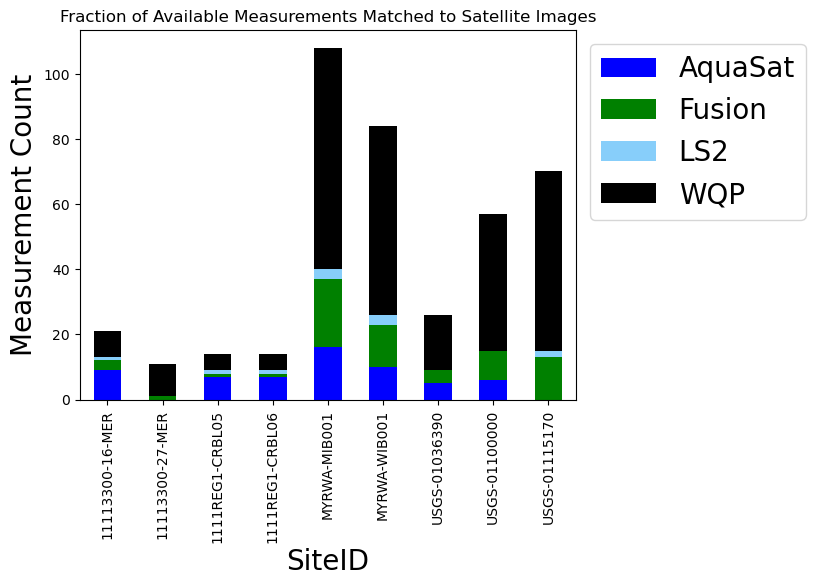

In [25]:
# print(aquaFusPlot.columns.values.tolist())
# print(wqpUnmatched.columns.values.tolist())

wqpUnmatched = wqpUnmatched[wqpUnmatched['SiteID'].isin(aquaFusSites)]#.drop_duplicates(subset = ['SiteID', 'date'])

aquaFusMerge = aquaFusPlot[['parameter','units','SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss', 'month', 'Matchup']]
hucMerge = wqpUnmatched[['parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'tss', 'Matchup']]
hucMerge = hucMerge[(hucMerge.date > '2000-01-01')] #& (hucMerge.SiteID != 'USGS-03086000')
#aquaFusMerge = aquaFusMerge[(aquaFusMerge.SiteID != 'USGS-03086000')]


aquaFWqp = pd.concat([aquaFusMerge, hucMerge]).drop_duplicates(subset = ['SiteID', 'date'])

aquaFWqp = aquaFWqp.groupby(['SiteID', 'Matchup'])['tss'].count().unstack()#.fillna(0)
aquaFWqp.plot(kind='bar', stacked=True, color = ['blue', 'green', 'lightskyblue', 'black'])
plt.ylabel('Measurement Count', fontsize = '20')
plt.xlabel('SiteID', fontsize = '20')
plt.title('Fraction of Available Measurements Matched to Satellite Images')
#plt.tick_params(bottom=False, labelbottom=False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='20')

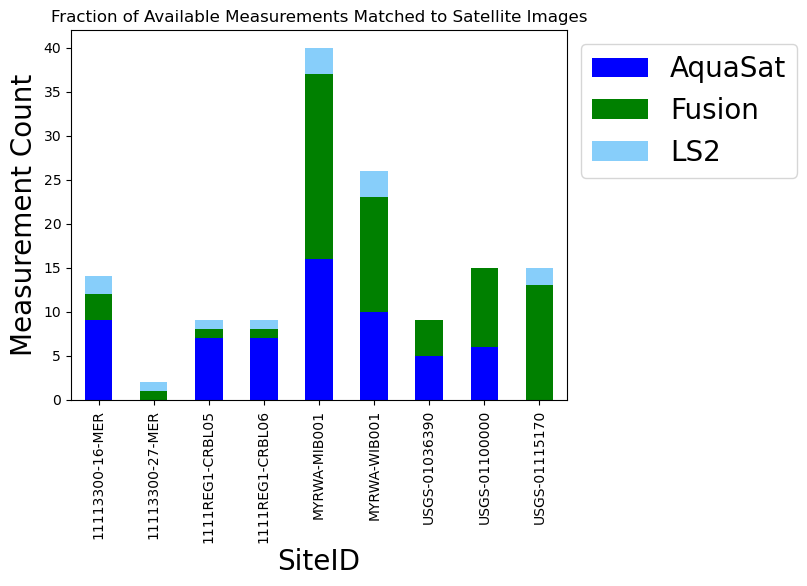

In [26]:
# print(aquaFusPlot.columns.values.tolist())
# print(wqpUnmatched.columns.values.tolist())

#wqpUnmatched = wqpUnmatched[wqpUnmatched['SiteID'].isin(fusionSites)]#.drop_duplicates(subset = ['SiteID', 'date'])

aquaFusMerge = aquaFusPlot[['parameter','units','SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'year', 'tss', 'month', 'Matchup']]
#hucMerge = wqpUnmatched[['parameter', 'units', 'SiteID', 'lat', 'long', 'datum', 'particle_size', 'date', 'time', 'date_time', 'hydroCondition', 'hydroEvent', 'tss', 'Matchup']]
#hucMerge = hucMerge[(hucMerge.date > '2000-01-01')] #& (hucMerge.SiteID != 'USGS-03086000')
#aquaFusMerge = aquaFusMerge[(aquaFusMerge.SiteID != 'USGS-03086000')]


#aquaFWqp = pd.concat([aquaFusMerge, hucMerge]).drop_duplicates(subset = ['SiteID', 'date'])

aquaFWqp = aquaFusMerge.groupby(['SiteID', 'Matchup'])['tss'].count().unstack()#.fillna(0)
aquaFWqp.plot(kind='bar', stacked=True, color = ['blue', 'green', 'lightskyblue'])
plt.ylabel('Measurement Count', fontsize = '20')
plt.xlabel('SiteID', fontsize = '20')
plt.title('Fraction of Available Measurements Matched to Satellite Images')
#plt.tick_params(bottom=False, labelbottom=False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='20')

# Model

## RF

In [27]:
import numpy as np
import pandas as pd
from numpy import mean, arange
from numpy import std
import pprint
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn import ensemble, datasets, tree
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# AquaFusion: Define a Training and Testing Set



(111, 62)
(28, 62)
(111,)
(28,)


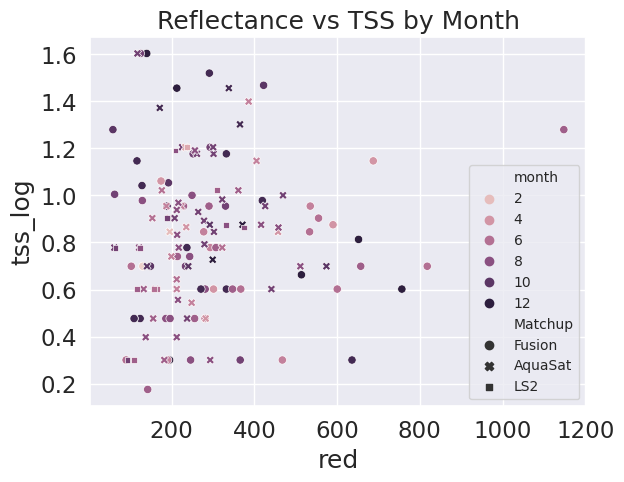

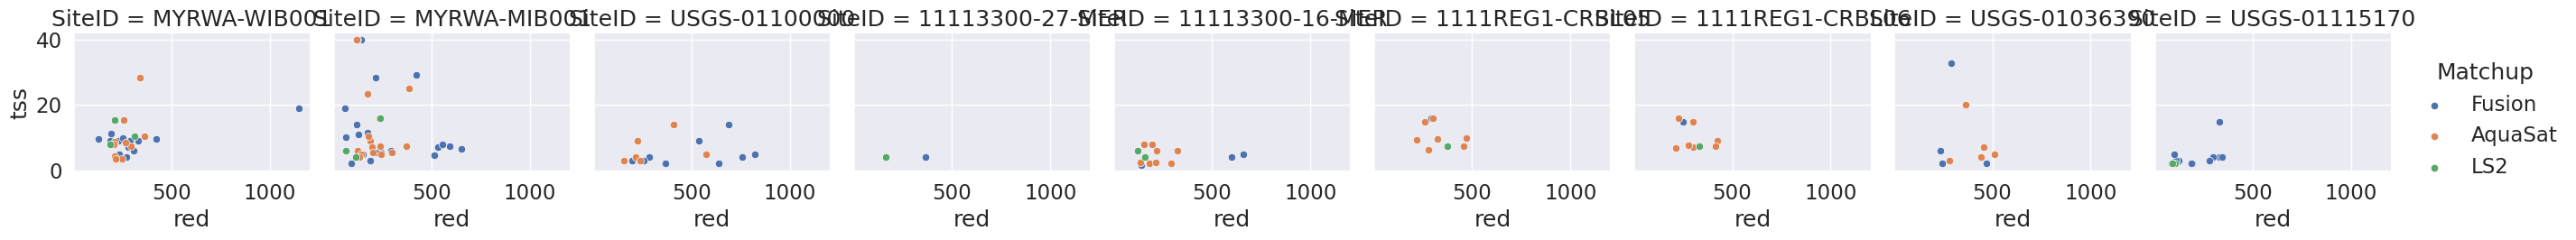

In [34]:
#hlsFusion = hlsFusion[(hlsFusion['tss'] < 200)] #& (hlsFusion['tss'] > 10)] 

#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']
labels = 'tss_log'
df= aquaFusPlot[['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'tss_log']].reset_index(drop=True).dropna(axis=0)

# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# summarize the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#define model
model = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

#Plot
plot = sns.scatterplot(data=aquaFusPlot, x="red", y="tss_log", 
                       legend = 'brief', 
                       style = 'Matchup', hue="month")
plt.legend(fontsize='10')
plt.title(label = 'Reflectance vs TSS by Month')
plot

sns.set(font_scale=1.5)
g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()


# Random Forest 1: No fit

In [35]:
#Quick eval raw
model.fit(X_train, y_train)
print('Trained model oob score', round(model.oob_score_,2))

X_train_predict=pd.DataFrame(model.predict(X_train))
prediction = model.predict(X_test)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    model.predict(X_test)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predict=pd.DataFrame(
    model.predict(X_train)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predict = pd.concat([X_train_predict, X_test_predict])


#Metrics for Model 1 

train = model.score(X_train, y_train)
test = model.score(X_test, y_test)
#Metrics
print('Training score', round(train,2))
print('Testing score', round(test,2))



errorsTrain = (abs(10**(model.predict(X_train)) - 10**(y_train))).mean()
print('Train MAE', round(errorsTrain, 2))

RMSE_modelTrain = np.sqrt(mean_squared_error(10**(y_train), 10**(model.predict(X_train))))
print('Train RMSE', round(RMSE_modelTrain, 2))

RMSE_model = np.sqrt(mean_squared_error(10**(y_test), 10**(prediction)))
print('Test RMSE', round(RMSE_model, 2))

# Calculate the absolute errors
errors = (abs(10**(prediction) - 10**(y_test))).mean()
print('Test MAE', round(errors, 2))

# Calculate mean absolute percentage error (MAPE)
mapeTrain = 100 * (errorsTrain / 10**(y_train))
# Calculate and display accuracy
accuracyTrain = 100 - np.mean(mapeTrain)
print('Train Accuracy:', round(accuracyTrain, 2), '%')

mape = 100 * (errors / 10**(y_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%')


#from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)


Trained model oob score 0.09
Training score 0.88
Testing score 0.01
Train MAE 1.87
Train RMSE 3.82
Test RMSE 8.1
Test MAE 4.58
Train Accuracy: 64.45 %
Test Accuracy: 1.68 %


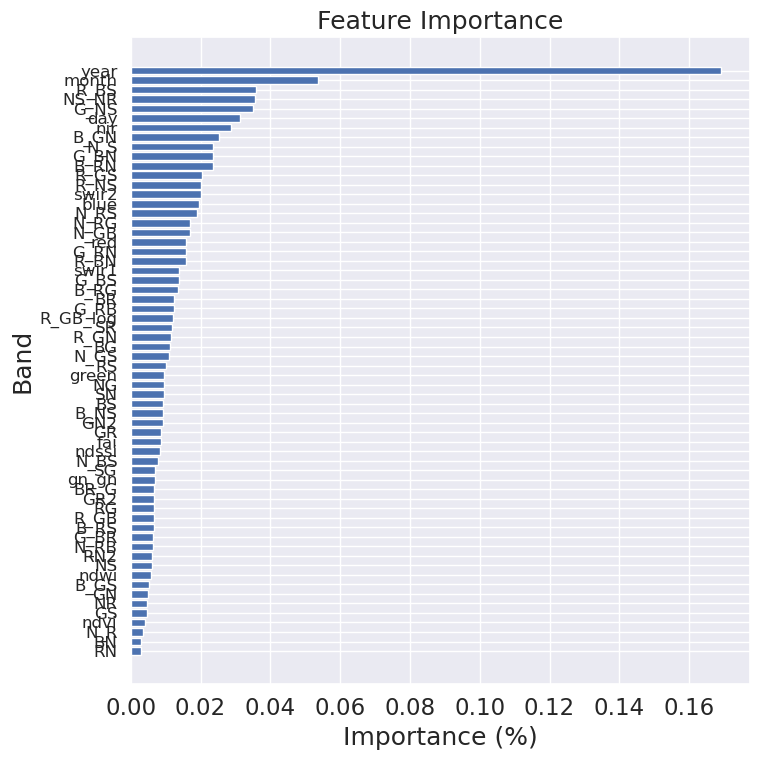

In [36]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


In [37]:
sorted_idx = np.argsort(feature_importance)
topFeats = df.columns[sorted_idx].values.tolist()
print(list(topFeats[-7:]))
print(list(topFeats[:-9:-1]))
print(topFeats[:-9:-1])
feats = topFeats[:-9:-1]

['nir', 'day', 'G_NS', 'NS_NR', 'R_BS', 'month', 'year']
['year', 'month', 'R_BS', 'NS_NR', 'G_NS', 'day', 'nir', 'B_GN']
['year', 'month', 'R_BS', 'NS_NR', 'G_NS', 'day', 'nir', 'B_GN']


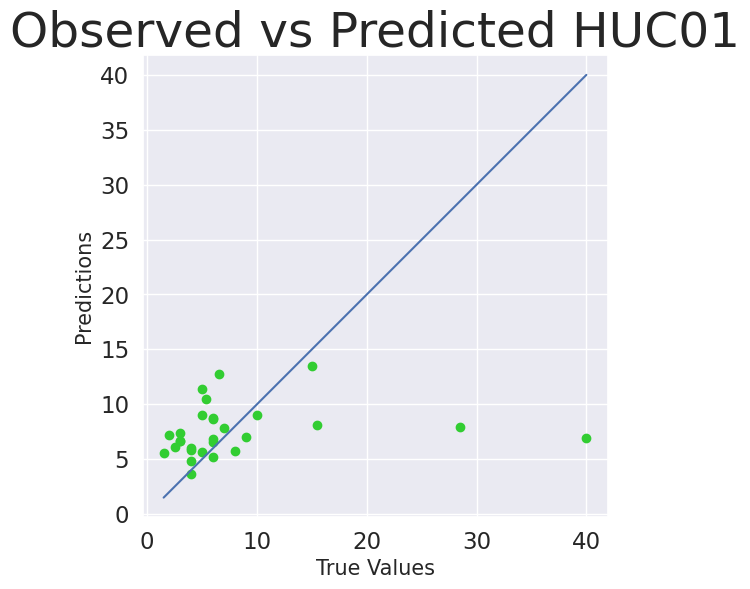

4.579195537612919


<AxesSubplot: >

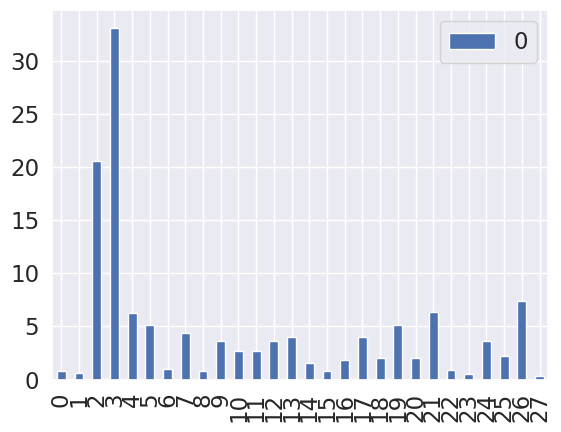

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(10**(y_test), 10**(prediction), c='limegreen')
plt.title('Observed vs Predicted' + ' ' + hucname, fontsize = 35)

p1 = max(max(10**(prediction)), max(10**(y_test)))
p2 = min(min(10**(prediction)), min(10**(y_test)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs(10**(prediction) - 10**(y_test))
print((errors.mean()))
pd.DataFrame((errors)).plot(kind='bar')

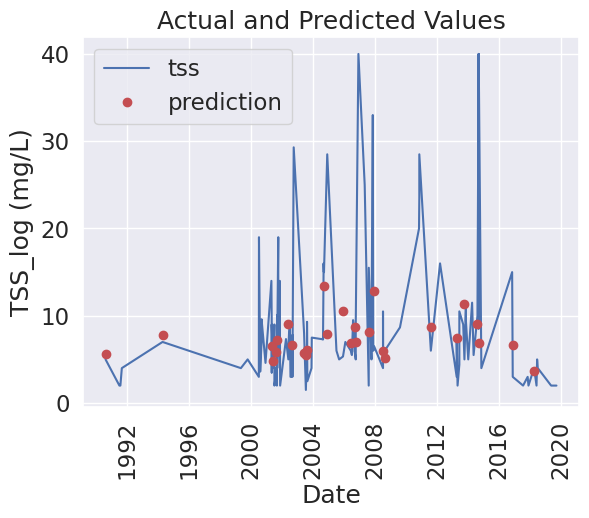

In [39]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': 10**y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': 10**prediction})

#PLOT
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 'vertical'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [ ]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [51]:
# ###takes a lot of time. See results below.

# from sklearn.model_selection import GridSearchCV

# estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
# param_grid = {
#             "n_estimators" : [100, 150, 200, 300],
#             "max_features" : ["1.0", "log2", "sqrt"],
#             "max_depth"    : [1, 4, 7, 8, 10]
#         }


# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
# grid.fit(X_train, y_train)


# forest = grid.best_estimator_

# grid_prediction=forest.predict(X_test)

# print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

# mae_grid = mean_absolute_error(y_test, grid_prediction)
# RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

# print('MAE:', mae_grid)
# print('RMSE:', RMSE_model_grid)

# Fusion: Define a Training and Testing Set



(49, 62)
(17, 62)
(49,)
(17,)


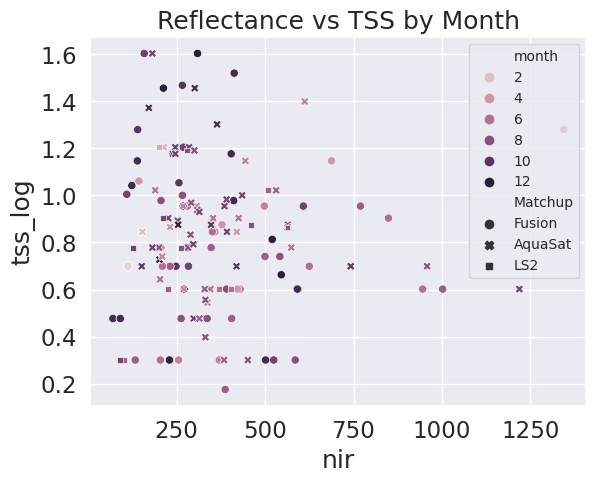

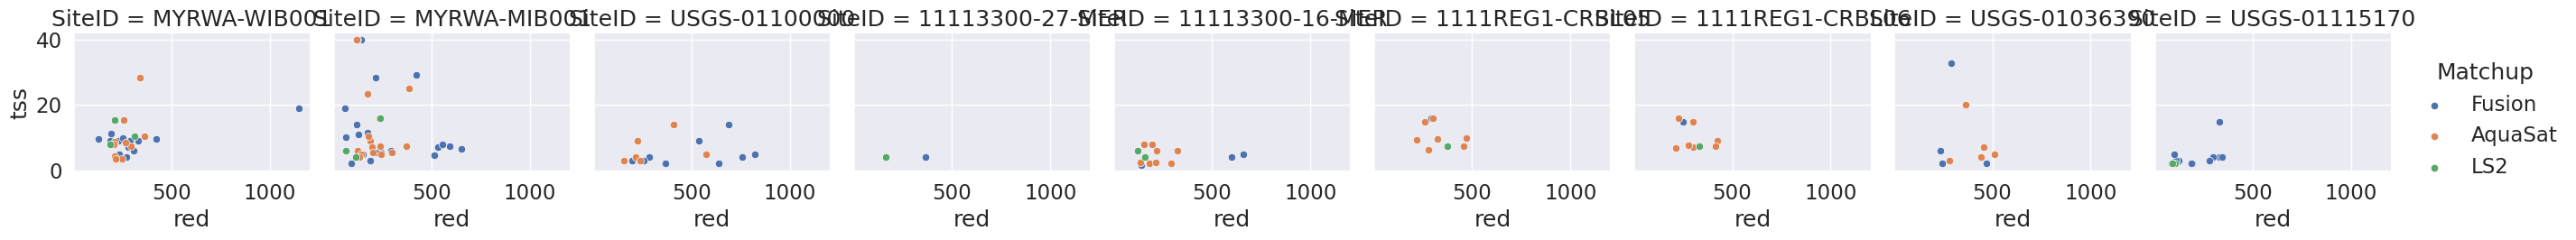

In [40]:
fusionRF = aquaFusPlot[(aquaFusPlot['Matchup'] == 'Fusion')] #& (hlsFusion['tss'] > 10)] 

#define a training and testing set
features = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day']
labels = 'tss_log'
df= fusionRF[['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'R_GB_log',
                 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 
                 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 
                 'N_BS', 'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'RN2',
                 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'year', 'month', 'day', 'tss_log']].reset_index(drop=True)


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_trainB, X_testB, y_trainB, y_testB = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_trainB.shape)
print(X_testB.shape)
print(y_trainB.shape)
print(y_testB.shape)

#define model
modelB = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

#Plot
plot = sns.scatterplot(data=aquaFusPlot, x="nir", y="tss_log", 
                       legend = 'brief', 
                       style = 'Matchup', hue="month")
plt.legend(fontsize='10')
plt.title(label = 'Reflectance vs TSS by Month')
plot

sns.set(font_scale=1.5)
g = sns.FacetGrid(aquaFusPlot, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="red", y="tss")
g.add_legend()


# Random Forest 1: No fit

In [41]:
#Quick eval raw
modelB.fit(X_trainB, y_trainB)
print('Trained model oob score', model.oob_score_)

X_train_predictB=pd.DataFrame(model.predict(X_trainB))
predictionB = modelB.predict(X_testB)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictB=pd.DataFrame(
    modelB.predict(X_testB)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictB=pd.DataFrame(
    modelB.predict(X_trainB)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictB = pd.concat([X_train_predictB, X_test_predictB])

#Metrics for Model 1 

RMSE_modelB = np.sqrt(mean_squared_error(10**(y_testB), 10**(predictionB)))
trainB = modelB.score(X_trainB, y_trainB)
testB = modelB.score(X_testB, y_testB)
#Metrics
print('Training score', modelB.score(X_trainB, y_trainB))
print('RMSE', RMSE_modelB)
print('Testing score', modelB.score(X_testB, y_testB))

# Calculate the absolute errors
errorsB = (abs(10**(predictionB) - 10**(y_testB))).mean()
print('MAE', (errorsB))

# Calculate mean absolute percentage error (MAPE)
mapeB = 100 * (errorsB / 10**(y_testB))
# Calculate and display accuracy
accuracyB = 100 - np.mean(mapeB)
print('Accuracy:', round(accuracyB, 2), '%')

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

Trained model oob score 0.09118783197644675
Training score 0.8576679470310522
RMSE 7.358738152445343
Testing score -0.0030158953610954775
MAE 5.139068721904827
Accuracy: -23.08 %


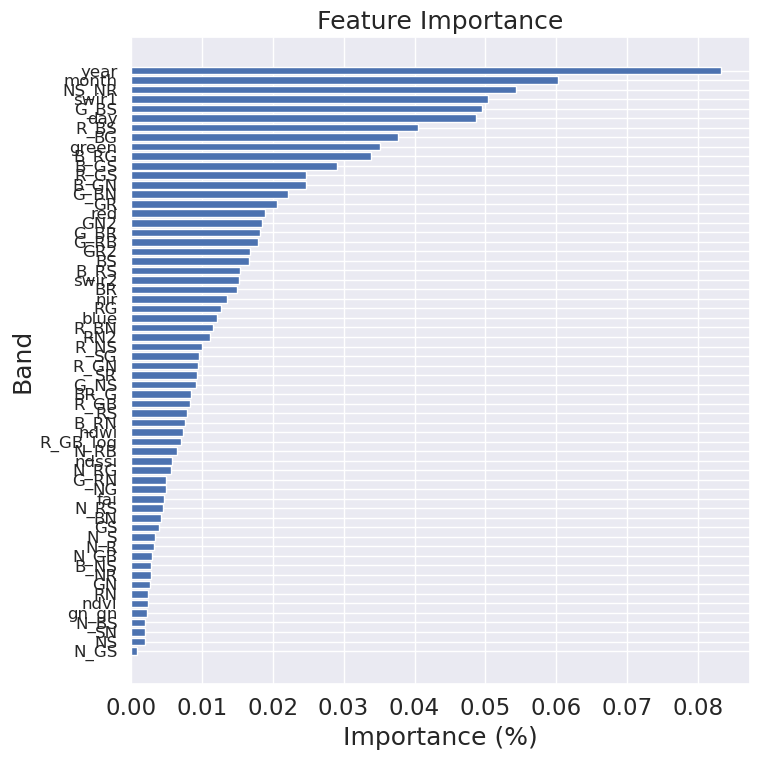

In [42]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importanceB = modelB.feature_importances_
sorted_idxB = np.argsort(feature_importanceB)
posB = np.arange(sorted_idxB.shape[0]) + .5
figB = plt.figure(figsize=(8, 8))
plt.barh(posB, feature_importanceB[sorted_idxB], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(posB, np.array(df.columns)[sorted_idxB], size = 12)
plt.title('Feature Importance')
resultB = permutation_importance(modelB, X_testB, y_testB, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idxB = resultB.importances_mean.argsort()
figB.tight_layout()
plt.show()


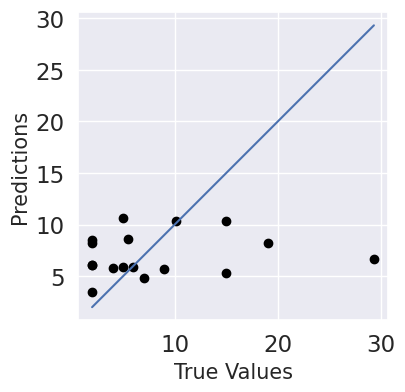

5.139068721904827


<AxesSubplot: >

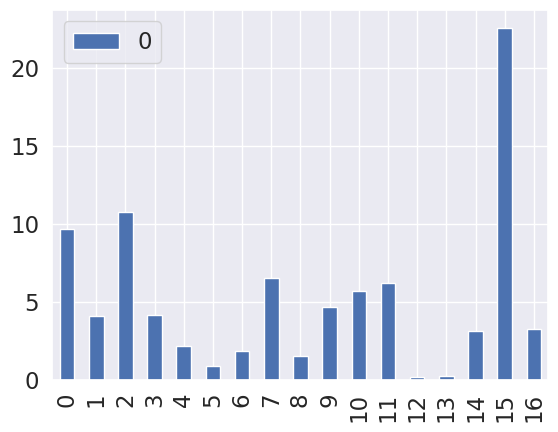

In [43]:
plt.figure(figsize=(4,4))
plt.scatter(10**(y_testB), 10**(predictionB), c='black')

p1 = max(max(10**(predictionB)), max(10**(y_testB)))
p2 = min(min(10**(predictionB)), min(10**(y_testB)))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errorsB = abs(10**(predictionB) - 10**(y_testB))
print((errorsB.mean()))
pd.DataFrame((errorsB)).plot(kind='bar')

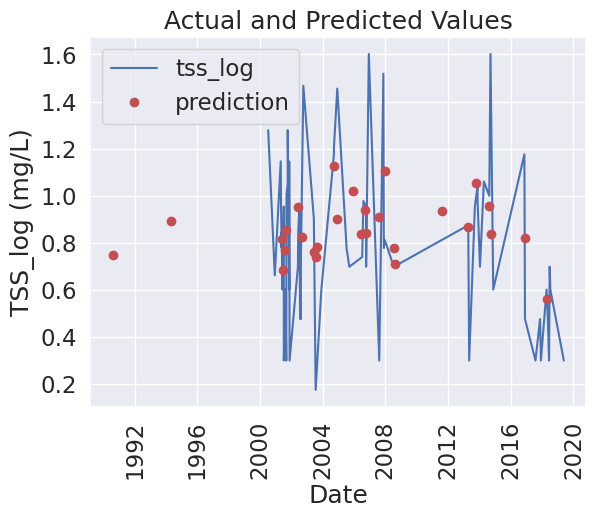

In [44]:
# Dates of training values
import datetime
months = X[:, feature_list.index('month')]
days = X[:, feature_list.index('day')]
years = X[:, feature_list.index('year')]# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# Dates of predictions
months = X_test[:, feature_list.index('month')]
days = X_test[:, feature_list.index('day')]
years = X_test[:, feature_list.index('year')]# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

#PLOT
# Dataframe with predictions and dates
plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 'vertical'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

In [45]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

# Aquasat Performance Using Fusion Sites Only

In [46]:
#AquaFusion data
#print(aquahuc.columns.values.tolist())

aquahuc_model = aquahuc[aquahuc['SiteID'].isin(fusionSites)]
aquahuc_model = aquahuc[(aquahuc.pixelCount > 8)]

aquahuc = aquahuc[['SiteID', 'date', 'blue', 'blue_sd', 'green', 'green_sd', 
                     'nir', 'nir_sd', 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2',
                     'swir2_sd', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 
                     'timediff', 'Matchup', 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG',
                     'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 
                     'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 
                     'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 
                     'GR2', 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 
                     'gn_gn', 'RN2','month', 'R_GB_log', 'tss_log']]


print(aquahuc_model.columns.values.tolist())
print(len(aquahuc_model.index))
print(len(aquahuc_model.SiteID.unique()))

['Unnamed: 0.1', 'Unnamed: 0', 'system.index', 'SiteID', 'blue', 'blue_sd', 'date_unity', 'green', 'green_sd', 'nir', 'nir_sd', 'path', 'pixelCount', 'qa', 'qa_sd', 'red', 'red_sd', 'row', 'sat', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', '.geo', 'endtime', 'date', 'date_only', 'chl_a', 'doc', 'p_sand', 'secchi', 'tis', 'tss', 'source', 'lat', 'long', 'TZID', 'date_utc', 'clouds', 'time', 'landsat_id', 'timediff', 'pwater', 'type', 'id', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'GN2', 'RN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 'Matchup', 'sceneID', 'tss_log', 'R_GB_log', 'year', 'month', 'parameter', 'units', 'particle_size', 'hydroCondition', 'hydroEvent', 'dswe', 'dswe_sd', 'hillshade', 'hillshadow',

# Define a Training and Testing Set



In [52]:
#define a training and testing set

labels = 'tss_log'
df= aquahuc_model[['blue', 'blue_sd', 'green', 'green_sd', 'nir', 'nir_sd', 
                 'pixelCount', 'red', 'red_sd', 'swir1', 'swir1_sd', 'swir2', 'swir2_sd', 
                 'year', 'NR', 'BR', 'GR', 'SR', 'BG', 'RG', 'NG', 'SG', 'BN', 'GN', 
                 'RN', 'SN', 'BS', 'GS', 'RS', 'NS', 'R_GN', 'R_GB', 'R_GS', 'R_BN', 'R_BS', 
                 'R_NS', 'G_BR', 'G_BN', 'G_BS', 'G_RN', 'G_RB', 'G_NS', 'B_RG', 'B_RN', 'B_RS', 
                 'B_GN', 'B_GS', 'B_NS', 'N_RG', 'N_RB', 'N_RS', 'N_GB', 'N_GS', 'N_BS', 'GR2', 'RN2', 
                 'GN2', 'BR_G', 'NS_NR', 'fai', 'N_S', 'N_R', 'ndvi', 'ndwi', 'ndssi', 'gn_gn', 
                 'month', 'R_GB_log', 'tss_log']].reset_index(drop=True).dropna(axis=0) #[['year', 'R_GB',
                 #'month', 'R_GB_log', 'tss_log']].reset_index(drop=True) 


# Arrange Data into Features Matrix and Target Vector
# X = df.loc[:, df.columns != 'tss_log']
# y = df.loc[:, 'tss_log'].values
y = np.array(df[labels])
df = df.drop(labels, axis =1)
feature_list = list(df.columns)
X = np.array(df)


X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y, test_size=0.25, random_state = 42)

# summarize the dataset
print(X_trainA.shape)
print(X_testA.shape)
print(y_trainA.shape)
print(y_testA.shape)

#define model
modelA = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42)

(60, 68)
(21, 68)
(60,)
(21,)


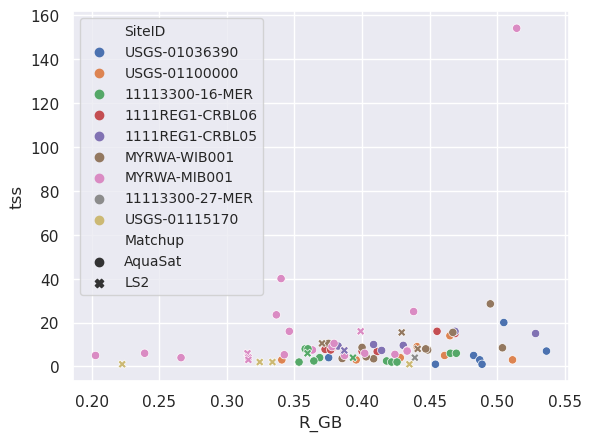

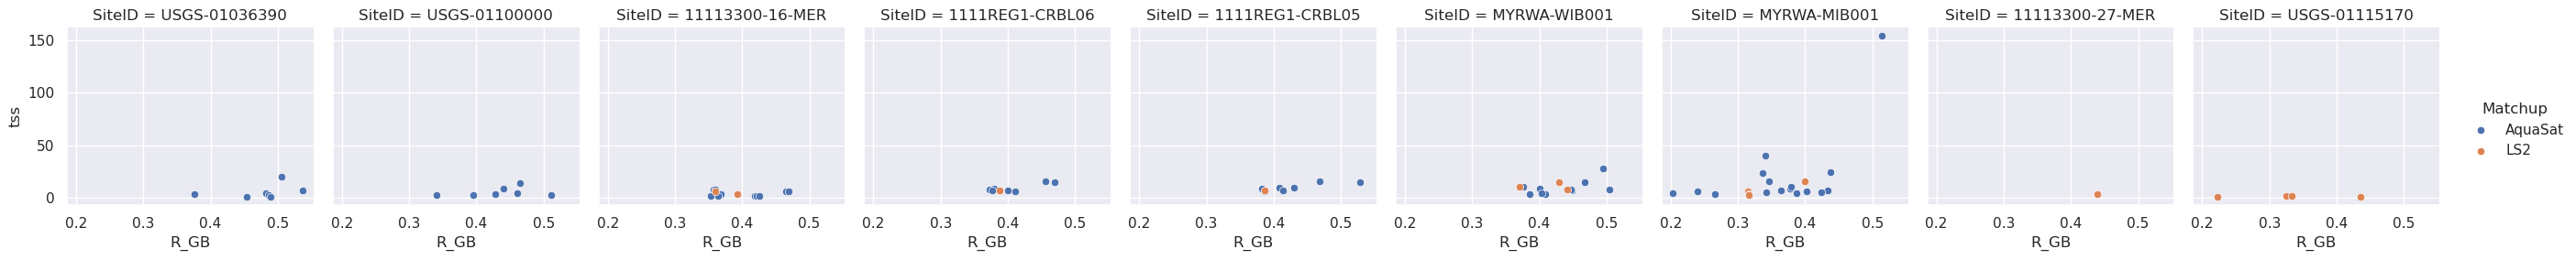

In [53]:
plot = sns.scatterplot(data=aquahuc_model, x="R_GB", y="tss", 
                       legend = 'brief', 
                       style = 'Matchup', hue="SiteID")
plt.legend(fontsize='10')
plot

sns.set(font_scale=1)
g = sns.FacetGrid(aquahuc_model, col="SiteID", hue = 'Matchup')
g.map_dataframe(sns.scatterplot, x="R_GB", y="tss")
g.add_legend()


# Random Forest Aquasat

Target: TSS

Input Data: 6 Bands

In [54]:
#Quick eval raw
modelA.fit(X_trainA, y_trainA)
print('Trained model oob score', modelA.oob_score_)

X_train_predictA=pd.DataFrame(modelA.predict(X_trainA))
predictionA = modelA.predict(X_testA)

# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predictA=pd.DataFrame(
    modelA.predict(X_testA)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
X_train_predictA=pd.DataFrame(
    modelA.predict(X_trainA)).rename(
    columns={0:'predicted_tss_log'}).set_index('predicted_tss_log')
# combine the training and testing dataframes to visualize
# and compare.
RF_predictA = pd.concat([X_train_predictA, X_test_predictA])

#Metrics for Model 1 

RMSE_modelA = np.sqrt(mean_squared_error(10**(y_testA), 10**(predictionA)))
trainA = modelA.score(X_trainA, y_trainA)
testA = modelA.score(X_testA, y_testA)
#Metrics
print('Training score', modelA.score(X_trainA, y_trainA))
print('RMSE', RMSE_modelA)
print('Testing score', modelA.score(X_testA, y_testA))

# Calculate the absolute errors
errorsA = (abs(10**(predictionA) - 10**(y_testA))).mean()
print('MAE', (errorsA))

# Calculate mean absolute percentage error (MAPE)
mapeA = 100 * (errorsA / 10**(y_testA))
# Calculate and display accuracy
accuracyA = 100 - np.mean(mapeA)
print('Accuracy:', round(accuracyA, 2), '%')

from sklearn.metrics import r2_score
# RSquared = r2_score(y_train, X_train_predict.reset_index().values)
# print('RSquared', RSquared)

Trained model oob score 0.011203324274171367
Training score 0.8726839860067537
RMSE 6.253523895412466
Testing score 0.021242630999517065
MAE 3.889368660218658
Accuracy: 22.87 %


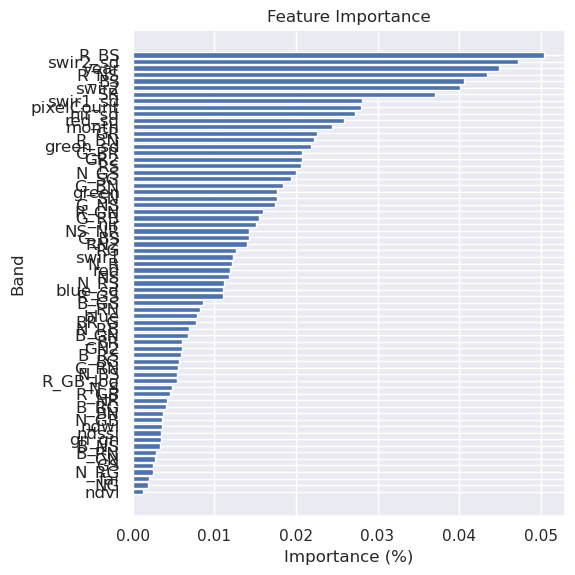

In [55]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 15})
feature_importance = modelA.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(6, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 12)
plt.title('Feature Importance')
result = permutation_importance(modelA, X_testA, y_testA, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()



In [51]:
#y_testA = 10**(y_testA)
#predictionA = 10**(predictionA)
#y_test = 10**(y_test)
#prediction = 10**(prediction)

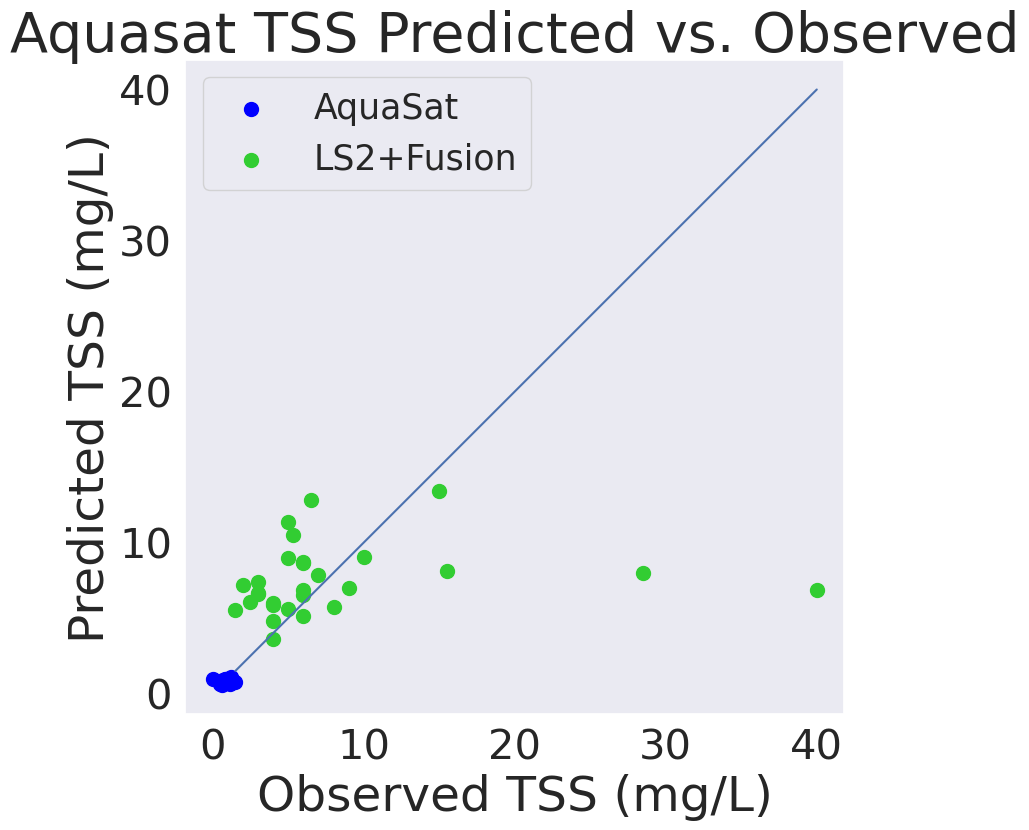

In [56]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='blue', label = 'AquaSat', s = 100)
plt.scatter((y_test), (prediction), c='limegreen', label = 'LS2+Fusion', s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat TSS Predicted vs. Observed', fontsize = 40)
plt.show()


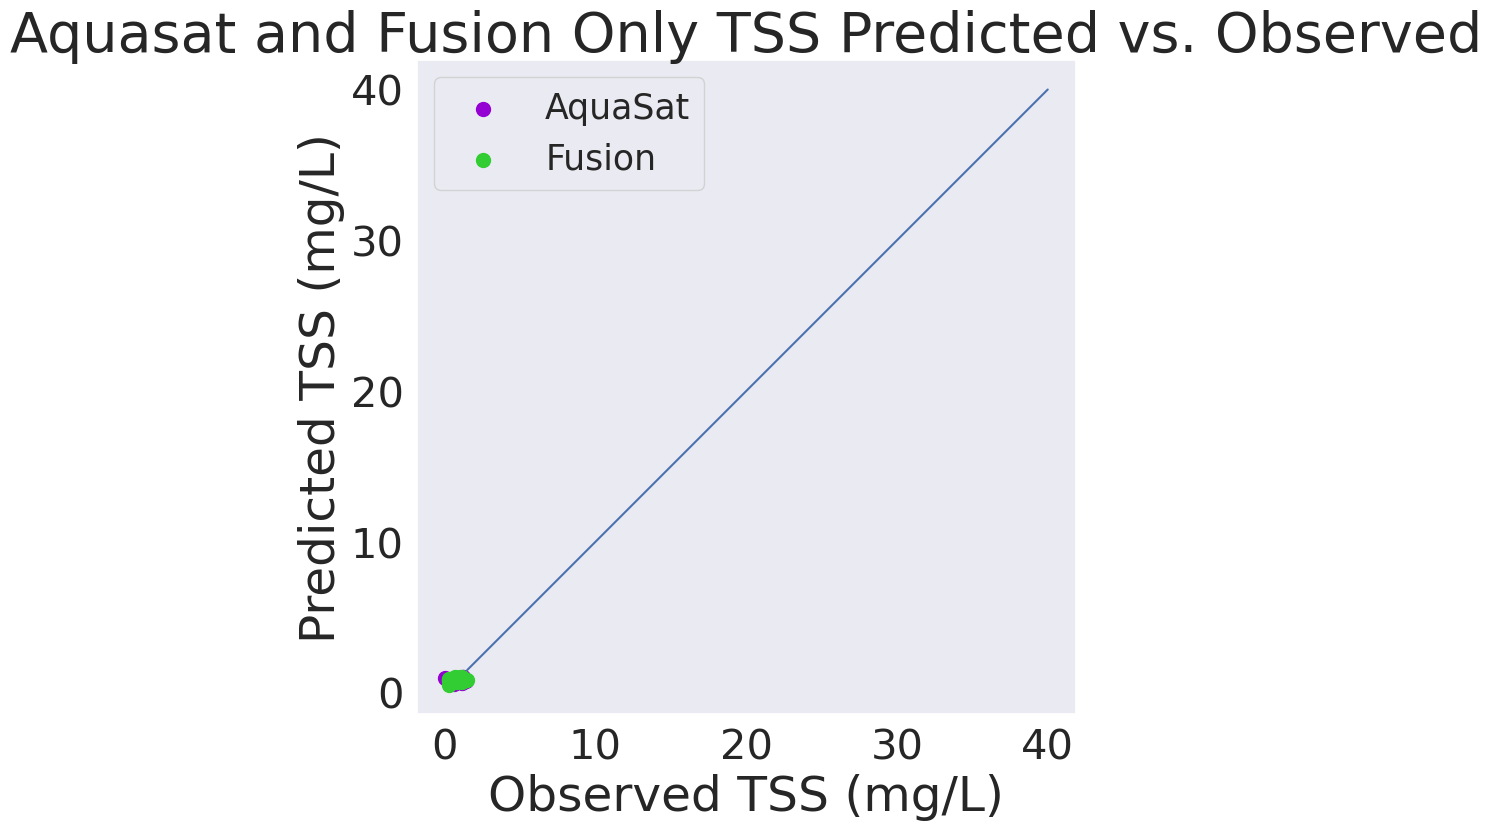

In [57]:
from math import e

plt.figure(figsize=(8.5,8.5))
plt.scatter((y_testA), (predictionA), c='darkviolet', label = 'AquaSat', s = 100)
plt.scatter((y_testB), (predictionB), c='limegreen', label = 'Fusion', s =100)

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed TSS (mg/L)', fontsize=35)
plt.ylabel('Predicted TSS (mg/L)', fontsize=35)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.axis('equal')
plt.grid(False)
plt.legend(loc= 'upper left', fontsize = 25)
plt.title('Aquasat and Fusion Only TSS Predicted vs. Observed', fontsize = 40)
plt.show()


4.579


Text(0.5, 1.0, 'Prediction Absolute Errors')

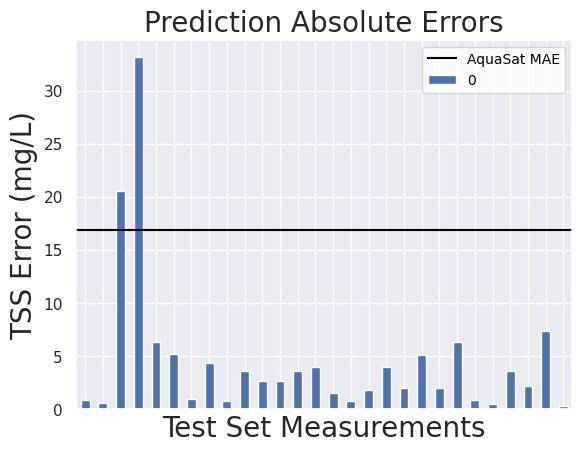

In [58]:
#Plot the 'difference' between true and prediction
# Calculate the absolute errors
errors = abs((prediction) - ((y_test)))
maeA = float(format(mean(errors), '.3f'))
print(maeA)
pd.DataFrame(errors).plot(kind='bar')
plt.tick_params(bottom=False, labelbottom=False)
#plt.rcParams.update({'axes.facecolor':'white'})
plt.rcdefaults()
plt.axhline(y = 16.84, color = 'black', linestyle = '-', label = 'AquaSat MAE')
plt.legend()
plt.xlabel('Test Set Measurements', fontsize = 20); plt.ylabel('TSS Error (mg/L)', fontsize = 20); plt.title('Prediction Absolute Errors', fontsize = 20)

In [48]:
# # Dates of training values
# import datetime
# months = X[:, feature_list.index('month')]
# days = X[:, feature_list.index('day')]
# years = X[:, feature_list.index('year')]# List and then convert to datetime object
# dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]# Dataframe with true values and dates
# true_data = pd.DataFrame(data = {'date': dates, 'tss_log': y}).sort_values(by='date')

# # Dates of predictions
# months = X_test[:, feature_list.index('month')]
# days = X_test[:, feature_list.index('day')]
# years = X_test[:, feature_list.index('year')]# Column of dates
# test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]# Convert to datetime objects
# test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]# Dataframe with predictions and dates
# predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# # Dataframe with predictions and dates
# plt.plot(true_data['date'], true_data['tss_log'], 'b-', label = 'tss_log')# Plot the predicted values
# plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# plt.xticks(rotation = '60'); 
# plt.legend()# Graph labels
# plt.xlabel('Date'); plt.ylabel('TSS_log (mg/L)'); plt.title('Actual and Predicted Values');

           Metric  AquaFusion (n = 308)  AquaSat (n = 124)
0  Training Score              0.941775           0.948032
1   Testing Score              0.645456           0.518597
2     RMSE (mg/L)             33.511501          42.038046
3      MAE (mg/L)             20.081976          23.723148
4        Accuracy            -77.394388         -99.946229


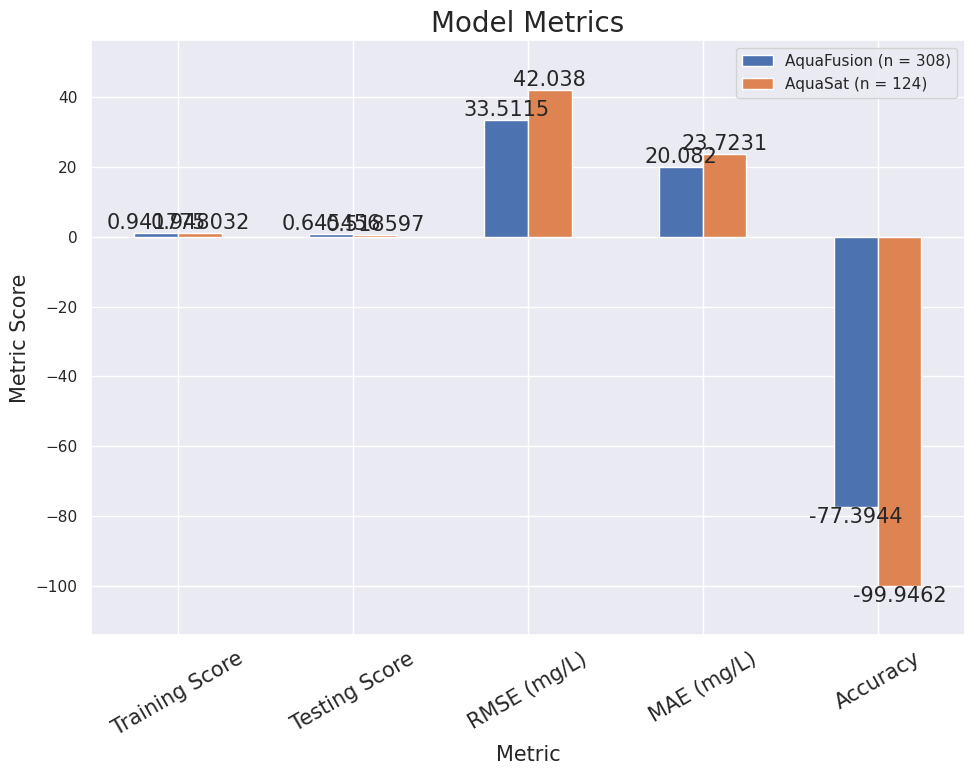

In [145]:
data = {'AquaFusion (n = 308)':[train, test, RMSE_model, errors, accuracy],'AquaSat (n = 124)':[trainA, testA, RMSE_modelA, errorsA, accuracyA]}
metric=pd.DataFrame(['Training Score', 'Testing Score', 'RMSE (mg/L)', 'MAE (mg/L)', 'Accuracy'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame(data)],axis=1)
mod_names = ['AquaFusion (n = 308)', 'AquaSat (n = 124)']

print(df)

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Model Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Metric Score', fontsize = 15)
plt.xlabel('Metric', fontsize = 15)
plt.xticks(rotation = 30, fontsize = 15)
plt.title(label = 'Model Metrics',fontsize = 20)
plt.tight_layout()
plt.show()

In [149]:
#Collect the test set predictions for d-h models

# model_pred = model.predict(X_test)
# model1_pred = model1.predict(X_test)


# Keep predictions of models d-h
model_train_pred = [model.predict(X_train), modelA.predict(X_trainA)]

model_test_pred = [model.predict(X_test), modelA.predict(X_testA)]

# predicted MAE and MSE for training data

models_MAE = []
for i in model_train_pred:
    MAE = np.round(mean_absolute_error(y_train, i),2)
    models_MAE.append(MAE)

models_RMSE = []
for i in model_train_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_train, i)),2)
    models_RMSE.append(RMSE)

    
# Plot
mod_names=['AquaFusion', 'AquaSat']
metric=pd.DataFrame(['MAE','RMSE'],columns=['Metric'])
df = pd.concat([metric,pd.DataFrame([models_MAE,models_RMSE],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Training Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Training Metric Score (mg/L)')
plt.tight_layout()
plt.show()

#Predict MAE and RMSE for test data

models_MAE_test = []
for i in model_test_pred:
    MAE = np.round(mean_absolute_error(y_test, i),2)
    models_MAE_test.append(MAE)

models_RMSE_test = []
for i in model_test_pred:
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, i)),2)
    models_RMSE_test.append(RMSE)

# Plot
df = pd.concat([metric,pd.DataFrame([models_MAE_test,models_RMSE_test],columns=mod_names)],axis=1)

print(df.head())

ax = df.plot(x="Metric", y=mod_names, kind="bar", title = 'Testing Metrics', figsize=(10,8))
# annotate
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.ylabel('Test Metric Score (mg/L)')
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [437, 306]

# Model with some fitted params

In [ ]:
# ###takes a lot of time. See results below.

# from sklearn.model_selection import GridSearchCV

# estimator = RandomForestRegressor(bootstrap = True, oob_score= True, random_state = 42, verbose = 0)
# param_grid = {
#             "n_estimators" : [100, 150, 200, 300],
#             "max_features" : ["1.0", "log2", "sqrt"],
#             "max_depth"    : [1, 4, 7, 8, 10]
#         }


# grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv= 5, verbose =0)
# grid.fit(X_train, y_train)


# forest = grid.best_estimator_

# grid_prediction=forest.predict(X_test)

# print ('Grid best score:', grid.best_score_, 'Grid best params:', grid.best_params_)

# mae_grid = mean_absolute_error(y_test, grid_prediction)
# RMSE_model_grid = np.sqrt(mean_squared_error(y_test, grid_prediction))

# print('MAE:', mae_grid)
# print('RMSE:', RMSE_model_grid)

In [147]:
#define model
model1 = RandomForestRegressor(max_depth = 8, n_estimators = 150, min_samples_split = 2, max_features = 'sqrt', bootstrap = True, oob_score= True, warm_start = False, ccp_alpha = 0, min_impurity_decrease = 0)

In [37]:
#Quick eval raw
model1.fit(X_train, y_train)
print('Trained model oob score', 1 - model1.oob_score_)

prediction1 = model1.predict(X_test)
print('Test Score', model1.score(X_test, y_test))

Trained model oob score 0.7748260485549805
Test Score 0.019141613956127568


In [38]:
#Test Error: Model 1 RMSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#TEST

RMSE_model1 = np.sqrt(mean_squared_error(y_test, prediction1))

#Metrics
print('Training score', model1.score(X_train, y_train))
print('RMSE', RMSE_model1)
print('Testing score', model1.score(X_test, y_test))

Training score 0.8344340370804268
RMSE 29.48239133967024
Testing score 0.019141613956127568


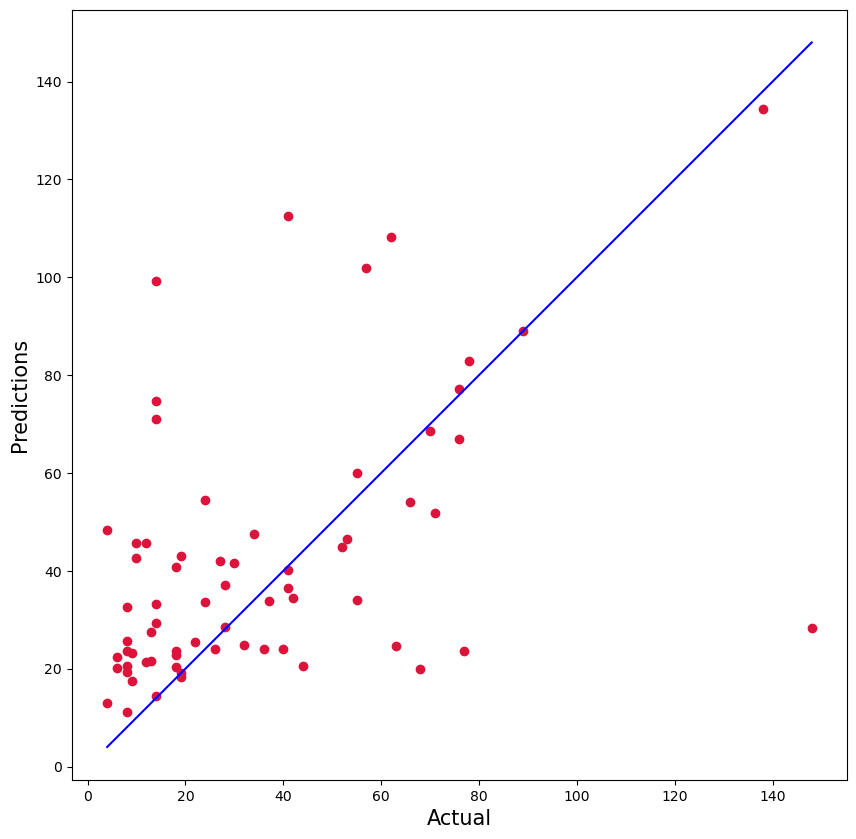

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

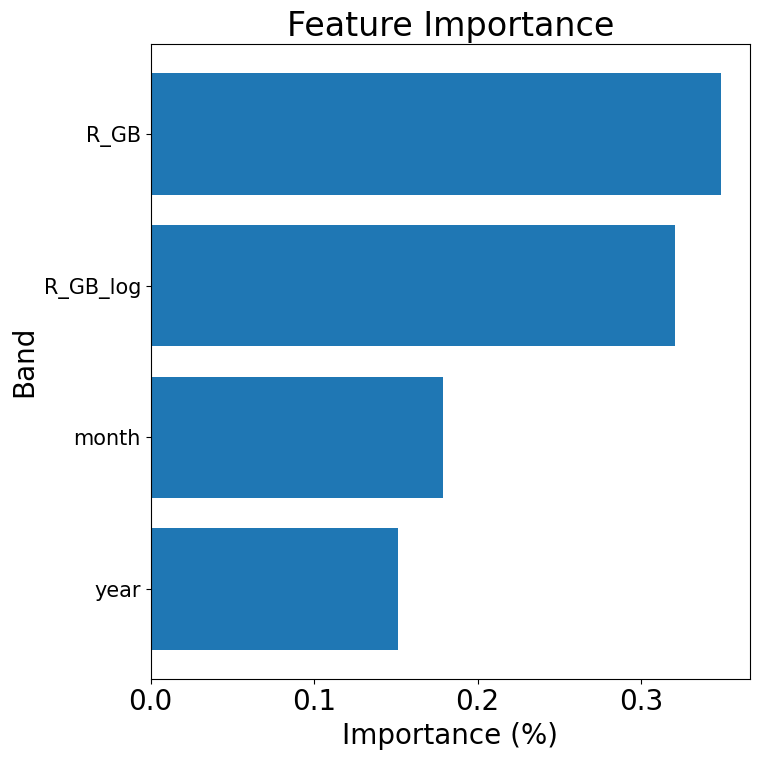

In [ ]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
plt.rcParams.update({'font.size': 20})
feature_importance = model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.ylabel('Band')
plt.xlabel('Importance (%)')
plt.yticks(pos, np.array(df.columns)[sorted_idx], size = 15)
plt.title('Feature Importance')
result = permutation_importance(model1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()


## Regressions

In [51]:
import statsmodels.api as sm
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2321']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'

#define predictor and response variables
y = df['tss']
x = df['red']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

MissingDataError: exog contains inf or nans

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2253']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss_log']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(-1, 5, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')

In [ ]:
df = aquaFusion[aquaFusion['SiteID'] == 'INSTOR_WQX-2221']#'USGS-03086000',INSTOR_WQX-2221 #'USGS-03049625'
#define predictor and response variables
y = df['tss']
x = df['R_GB_log']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

import matplotlib.pyplot as plt

#find line of best fit
a, b = np.polyfit(df['R_GB_log'], df['tss_log'], 1)

#add points to plot
plt.scatter(df['R_GB_log'], df['tss_log'], color='purple')

#add line of best fit to plot
plt.plot(df['R_GB_log'], a*df['R_GB_log']+b)

#add fitted regression equation to plot
plt.text(0.01, 1, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Reflectance Band Ratio')
plt.ylabel('TSS')